In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance/insurance.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.metrics import mean_absolute_error

In [3]:
path= "/kaggle/input/insurance/insurance.csv"
data= pd.read_csv(path)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.dtypes.value_counts()

object     3
float64    2
int64      2
dtype: int64

<AxesSubplot:>

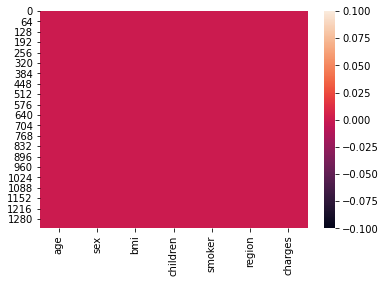

In [6]:
sns.heatmap(data.isnull())

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

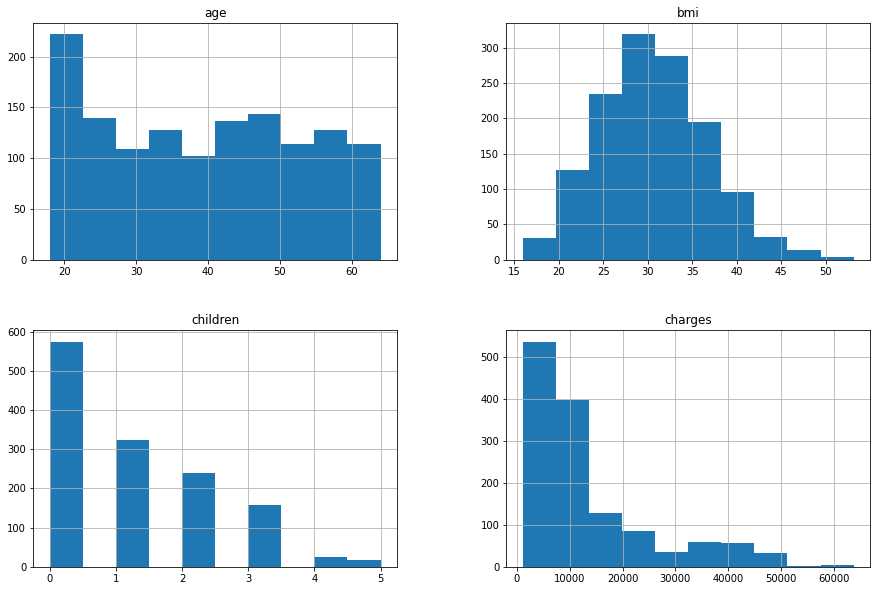

In [7]:
data.hist(figsize=(15,10))

<AxesSubplot:>

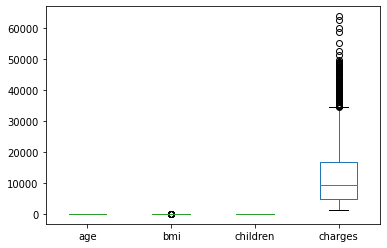

In [8]:
data.plot(kind="box")

<AxesSubplot:>

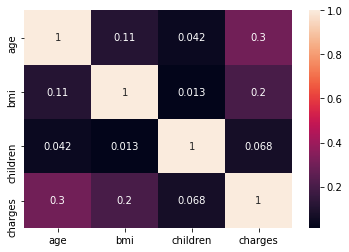

In [9]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='age', ylabel='charges'>

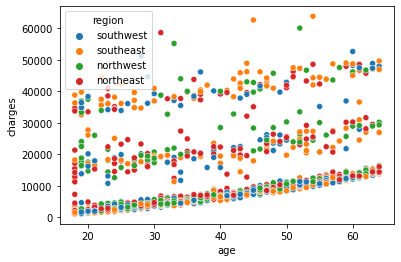

In [10]:
sns.scatterplot(x= "age", y="charges", data= data, hue="region")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

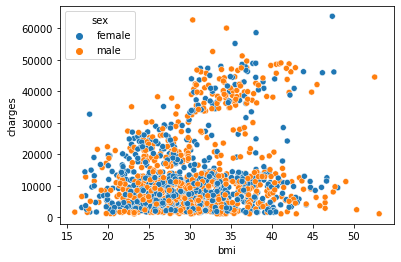

In [11]:
sns.scatterplot(x= "bmi", y="charges", data= data, hue="sex")

<AxesSubplot:xlabel='bmi', ylabel='charges'>

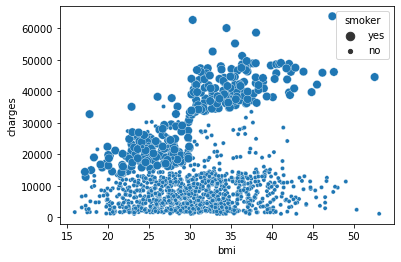

In [12]:
sns.scatterplot(x= "bmi", y="charges", data= data, size="smoker")

In [13]:
x= data.drop("charges", axis= 1)
y= data.charges

x.shape, y.shape

((1338, 6), (1338,))

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_tes= train_test_split(x,y,test_size= 0.3, random_state= 42)

In [15]:
cat_cols= data.select_dtypes(include="object").columns
num_cols= data.select_dtypes(exclude="object").columns

cat_cols, num_cols

(Index(['sex', 'smoker', 'region'], dtype='object'),
 Index(['age', 'bmi', 'children', 'charges'], dtype='object'))

In [16]:
num_cols= num_cols.drop("charges")

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [18]:
x_train, x_test

(      age     sex     bmi  children smoker     region
 332    61  female  31.160         0     no  northwest
 355    46    male  27.600         0     no  southwest
 138    54  female  31.900         3     no  southeast
 381    55    male  30.685         0    yes  northeast
 292    25    male  45.540         2    yes  southeast
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.350         4     no  northeast
 1130   39  female  23.870         5     no  southeast
 1294   58    male  25.175         0     no  northeast
 860    37  female  47.600         2    yes  southwest
 1126   55    male  29.900         0     no  southwest
 
 [936 rows x 6 columns],
       age     sex     bmi  children smoker     region
 764    45  female  25.175         2     no  northeast
 887    36  female  30.020         0     no  northwest
 890    64  female  26.885         0    yes  northwest
 1293   46    male  25.745         3     no  northwest
 259    19    male  31.920         0  

In [19]:
transformer= make_column_transformer( (OneHotEncoder(handle_unknown="ignore"), cat_cols),
                                      (MinMaxScaler(), num_cols),
                                     remainder= "passthrough"
                                    )

x_train= transformer.fit_transform(x_train)
x_test= transformer.transform(x_test)

In [20]:
x_train[0].shape, x_train.shape

((11,), (936, 11))

In [21]:
tf.random.set_seed(42)

In [22]:
model_1= keras.Sequential([
    keras.layers.Dense(4, input_shape=(11,)),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
], name="model-1")

In [23]:
model_1.compile(loss= "mae",
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"]
             )

In [24]:
model_1_history= model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 13352.2564 - mae: 13352.2564
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 13779.0640 - mae: 13779.0640
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 13106.2327 - mae: 13106.2327
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 13087.5226 - mae: 13087.5226
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 12084.1629 - mae: 12084.1629
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 6313.1632 - mae: 6313.1632
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 5662.5235 - mae: 5662.5235
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 6054.5323 - mae: 6054.5323
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 5699.2202 - mae: 5699.2202
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 5162.0169 - mae:

<AxesSubplot:>

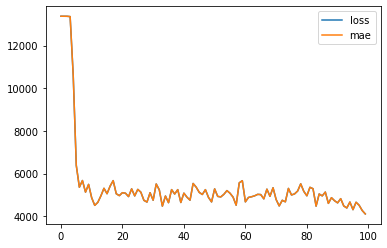

In [25]:
pd.DataFrame(model_1_history.history).plot()

In [26]:
model_1.evaluate(x_test, y_tes)

# Overfitting 

13/13 [==============================] - 0s 1ms/step - loss: 4555.5898 - mae: 4555.5898


[4555.58984375, 4555.58984375]

In [27]:
y_tes.shape, y_pred.shape

NameError: name 'y_pred' is not defined

In [28]:
y_pred= model_1.predict(x_test)
loss_1= mean_absolute_error(y_tes, tf.squeeze(y_pred)).numpy()
loss_1

4555.5894

> Model1 - training : 3493, testing : 5644

### Building model-2

In [29]:
model_2= keras.Sequential([
    keras.layers.Dense(8, input_shape=(11,),  activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
], name="model-2")

model_2.compile(loss= "mae",
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"]
             )

model_2_history= model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
30/30 [==============================] - 0s 1ms/step - loss: 13349.7446 - mae: 13349.7446
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 13487.8277 - mae: 13487.8277
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 8807.9497 - mae: 8807.9497
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 7524.6766 - mae: 7524.6766
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 6448.3679 - mae: 6448.3679
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 5295.7222 - mae: 5295.7222
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 3994.3130 - mae: 3994.3130
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 3462.5944 - mae: 3462.5944
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 3568.4409 - mae: 3568.4409
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 3149.4547 - mae: 3149.

<AxesSubplot:>

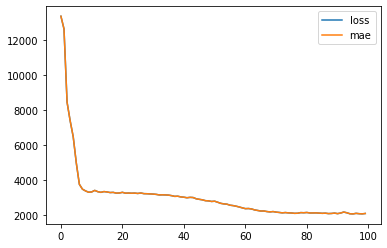

In [30]:
pd.DataFrame(model_2_history.history).plot()

In [31]:
model_2.evaluate(x_test, y_tes)

13/13 [==============================] - 0s 1ms/step - loss: 1767.6630 - mae: 1767.6630


[1767.6629638671875, 1767.6629638671875]

In [32]:
y_pred= model_2.predict(x_test)
loss_2= mean_absolute_error(y_tes, tf.squeeze(y_pred)).numpy()
loss_2

1767.663

> Model-2 - Training : 2231, Testing : 1835

### Building Model-3

In [33]:
model_3= keras.Sequential([
    keras.layers.Dense(8, input_shape=(11,),  activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
], name="model-3")

model_3.compile(loss= "mae",
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"]
             )

model_3_history= model_3.fit(x_train, y_train, epochs=120)

Epoch 1/120
30/30 [==============================] - 0s 1ms/step - loss: 13342.9334 - mae: 13342.9334
Epoch 2/120
30/30 [==============================] - 0s 1ms/step - loss: 13116.2111 - mae: 13116.2111
Epoch 3/120
30/30 [==============================] - 0s 1ms/step - loss: 8043.5116 - mae: 8043.5116
Epoch 4/120
30/30 [==============================] - 0s 1ms/step - loss: 7615.7450 - mae: 7615.7450
Epoch 5/120
30/30 [==============================] - 0s 1ms/step - loss: 6760.4330 - mae: 6760.4330
Epoch 6/120
30/30 [==============================] - 0s 1ms/step - loss: 5937.2550 - mae: 5937.2550
Epoch 7/120
30/30 [==============================] - 0s 1ms/step - loss: 4278.4130 - mae: 4278.4130
Epoch 8/120
30/30 [==============================] - 0s 1ms/step - loss: 3470.1063 - mae: 3470.1063
Epoch 9/120
30/30 [==============================] - 0s 1ms/step - loss: 3630.1212 - mae: 3630.1212
Epoch 10/120
30/30 [==============================] - 0s 1ms/step - loss: 3191.6988 - mae: 3191.

<AxesSubplot:>

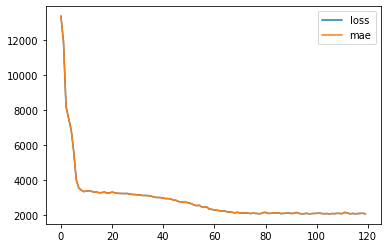

In [34]:
pd.DataFrame(model_3_history.history).plot()

In [35]:
model_3.evaluate(x_test, y_tes)

13/13 [==============================] - 0s 1ms/step - loss: 1741.7760 - mae: 1741.7760


[1741.7760009765625, 1741.7760009765625]

In [36]:
y_pred= model_3.predict(x_test)
loss_3= mean_absolute_error(y_tes, tf.squeeze(y_pred)).numpy()
loss_3

1741.776

> Model 3: Training : 1951, Testing : 1755

#### Same Model : Higher EPOCH

In [37]:
model_4= keras.Sequential([
    keras.layers.Dense(8, input_shape=(11,),  activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
], name="model-4")

model_4.compile(loss= "mae",
              optimizer= tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"]
             )

model_4_history= model_4.fit(x_train, y_train, epochs=150)

Epoch 1/150
30/30 [==============================] - 0s 1ms/step - loss: 13345.6436 - mae: 13345.6436
Epoch 2/150
30/30 [==============================] - 0s 1ms/step - loss: 13235.6647 - mae: 13235.6647
Epoch 3/150
30/30 [==============================] - 0s 1ms/step - loss: 8309.1775 - mae: 8309.1775
Epoch 4/150
30/30 [==============================] - 0s 1ms/step - loss: 7676.5690 - mae: 7676.5690
Epoch 5/150
30/30 [==============================] - 0s 1ms/step - loss: 6861.4026 - mae: 6861.4026
Epoch 6/150
30/30 [==============================] - 0s 1ms/step - loss: 6136.2232 - mae: 6136.2232
Epoch 7/150
30/30 [==============================] - 0s 1ms/step - loss: 4610.4542 - mae: 4610.4542
Epoch 8/150
30/30 [==============================] - 0s 1ms/step - loss: 3504.6400 - mae: 3504.6400
Epoch 9/150
30/30 [==============================] - 0s 1ms/step - loss: 3648.9666 - mae: 3648.9666
Epoch 10/150
30/30 [==============================] - 0s 1ms/step - loss: 3215.5802 - mae: 3215.

<AxesSubplot:>

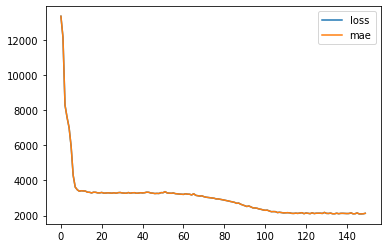

In [38]:
pd.DataFrame(model_4_history.history).plot()

In [39]:
model_4.evaluate(x_test, y_tes)

13/13 [==============================] - 0s 981us/step - loss: 1769.3016 - mae: 1769.3016


[1769.3016357421875, 1769.3016357421875]

In [40]:
y_pred= model_4.predict(x_test)
loss_4= mean_absolute_error(y_tes, tf.squeeze(y_pred)).numpy()
loss_4

1769.3018

<AxesSubplot:xlabel='models', ylabel='Losses'>

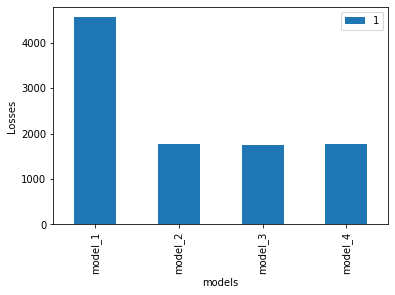

In [41]:
# Comparing all Models

res= [("model_1" , loss_1),
      ("model_2" , loss_2),
      ("model_3" , loss_3),
      ("model_4" , loss_4)
     ]
pd.DataFrame(res).set_index(0).plot(kind="bar", xlabel="models", ylabel="Losses")

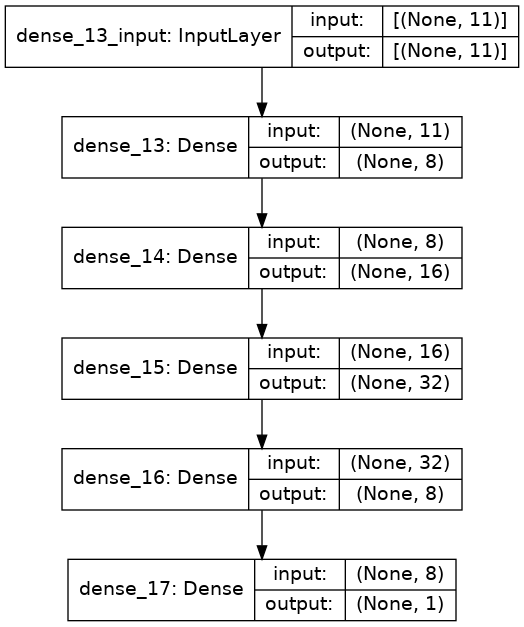

In [42]:
from tensorflow.keras.utils import plot_model

plot_model(model_4, show_shapes = True)

### saving the Model

In [43]:
model_4.save("medical_model_4.h5")

## Thanks for reading.... If u like this notebook, Please upvote it...
